In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

dates = pd.date_range(start = '2023-01-01', periods = 100, freq = 'D')
values = [10, 12, 11, 15, 9, 13, 8, 14, 10, 16] + [10] * 90
data = pd.DataFrame({'Date': dates, "Value": values})

model = ExponentialSmoothing(data['Value'], trend = 'add')
model_fit = model.fit()

trend = model_fit.predict(start = 0, end = len(data['Value']) - 1)

deviation = data['Value'] - trend

threshold = 2
outliers = abs(deviation) > threshold

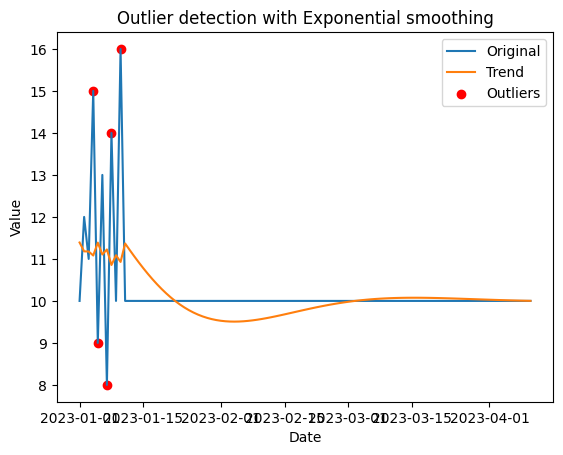

In [10]:
plt.plot(data['Date'], data['Value'], label = 'Original')
plt.plot(data['Date'], trend, label = 'Trend')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color = 'red', label = 'Outliers')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier detection with Exponential smoothing')
plt.legend()

plt.show()

In [11]:
trend

0     11.390967
1     11.180498
2     11.176589
3     11.081175
4     11.388085
        ...    
95    10.012197
96    10.009370
97    10.006721
98    10.004258
99    10.001982
Length: 100, dtype: float64